In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

from os import listdir


In [17]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
FOLDER = '/content/drive/MyDrive/colab/dogs_cats/train'

In [42]:
def show_image(indice):
  filename = FOLDER + '/' + df.iloc[indice]['file']
  img = imread(filename)
  plt.title('a ' + df.iloc[indice]['label'])
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [33]:
files = []
labels = []
for file in listdir(FOLDER):
  files.append(file)
  labels.append(file.split('.')[0])

In [35]:
df = pd.DataFrame({
    'file': files,
    'label': labels
})

In [36]:
df

,file,label
0,dog.100.jpg,dog
1,dog.10.jpg,dog
2,dog.1.jpg,dog
3,dog.0.jpg,dog
4,dog.101.jpg,dog
...,...,...
995,cat.95.jpg,cat
996,cat.96.jpg,cat
997,cat.97.jpg,cat
998,cat.98.jpg,cat


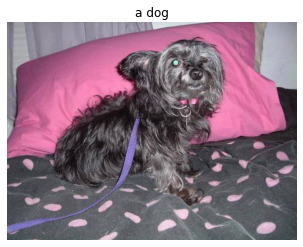

In [43]:
show_image(3)

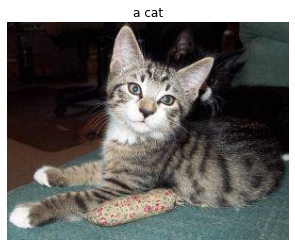

In [45]:
show_image(600)

In [54]:
X = df['file']
Y = df['label']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [49]:
from keras.preprocessing.image import ImageDataGenerator

In [50]:
train_datagen = ImageDataGenerator(
    rotation_range=25,
    horizontal_flip=True,
    height_shift_range=0.2,
    width_shift_range=0.2,
    rescale=1/255
)

In [59]:
df_train = pd.DataFrame()
df_train['file'] = x_train
df_train['label'] = y_train

In [61]:
train_data = train_datagen.flow_from_dataframe(
   df_train,
   FOLDER,
   x_col='file',
   y_col='label',
   target_size=(128,128),
   class_mode='binary'
)

Found 700 validated image filenames belonging to 2 classes.


In [62]:
df_test = pd.DataFrame()
df_test['file'] = x_test
df_test['label'] = y_test

In [63]:
test_datagen = ImageDataGenerator(
    rescale=1/255
)

test_data = test_datagen.flow_from_dataframe(
   df_test,
   FOLDER,
   x_col='file',
   y_col='label',
   target_size=(128,128),
   class_mode='binary'
)

Found 300 validated image filenames belonging to 2 classes.


In [72]:
example_df = df_train.sample(n=1)
example_df.iloc[0]['file']

'cat.272.jpg'

In [74]:
example_data = train_datagen.flow_from_dataframe(
   example_df,
   FOLDER,
   x_col='file',
   y_col='label',
   target_size=(128,128),
   class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


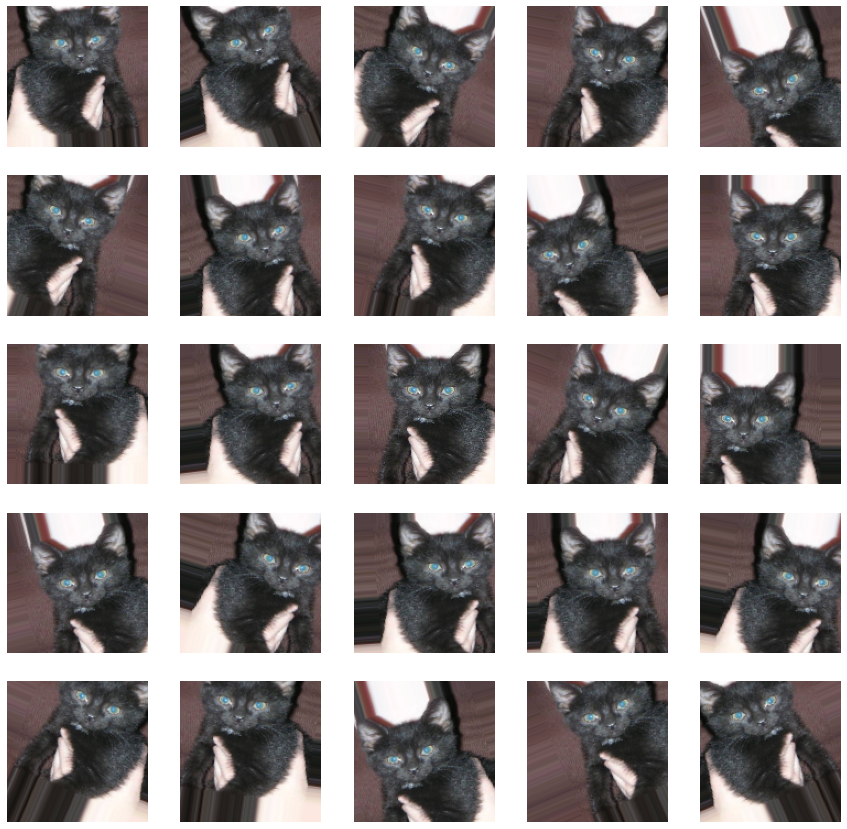

In [80]:
fig = plt.figure(figsize=(15,15))
for i in range(0, 25):
  plt.subplot(5,5, i+1)
  for x, y in example_data:
    img = x[0]
    plt.imshow(img)
    plt.axis('off')
    break
    del img
fig.show()

In [81]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [82]:
model = Sequential()

In [83]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [84]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [86]:
history = model.fit_generator(
    train_data,
    validation_data=test_data,
    epochs=20
)

Epoch 1/20
22/22 [==============================] - 215s 10s/step - loss: 0.7427 - accuracy: 0.5129 - val_loss: 0.6920 - val_accuracy: 0.5100
Epoch 2/20
22/22 [==============================] - 28s 1s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 3/20
22/22 [==============================] - 28s 1s/step - loss: 0.6866 - accuracy: 0.5386 - val_loss: 0.6826 - val_accuracy: 0.5400
Epoch 4/20
22/22 [==============================] - 28s 1s/step - loss: 0.6590 - accuracy: 0.6029 - val_loss: 0.6770 - val_accuracy: 0.5667
Epoch 5/20
22/22 [==============================] - 27s 1s/step - loss: 0.6642 - accuracy: 0.5657 - val_loss: 0.6741 - val_accuracy: 0.5633
Epoch 6/20
22/22 [==============================] - 27s 1s/step - loss: 0.6638 - accuracy: 0.5829 - val_loss: 0.6608 - val_accuracy: 0.5867
Epoch 7/20
22/22 [==============================] - 27s 1s/step - loss: 0.6484 - accuracy: 0.6000 - val_loss: 0.6557 - val_accuracy: 0.5667
Epoch 8/20
22/22 [

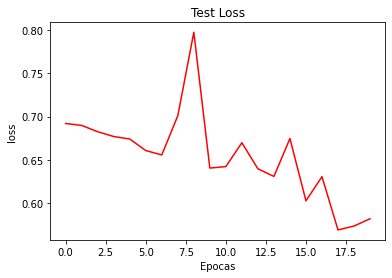

In [91]:
plt.plot(history.history['val_loss'], c='r', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Epocas')
plt.ylabel('loss')
plt.show()

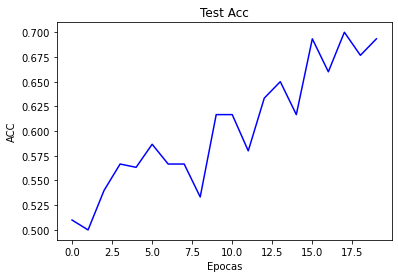

In [92]:
plt.plot(history.history['val_accuracy'], c='b', label='Acc')
plt.title('Test Acc')
plt.xlabel('Epocas')
plt.ylabel('ACC')
plt.show()

In [93]:
model.save('final_model.h5')

### um novo notebook

In [97]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

In [105]:
def classify(file):
  img = load_img(file, target_size=(128, 128))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1, 128, 128, 3)
  model = load_model('final_model.h5')
  result = model.predict(img)
  print(result[0])

[1.]


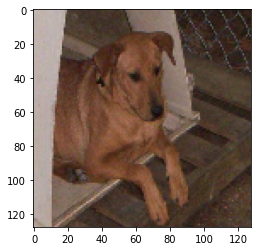

In [110]:
classify(FOLDER + '/dog.100.jpg')